## TensorFlow

In [1]:
import tensorflow as tf
import numpy as np

np.set_printoptions(precision=3)
a = np.array([1, 2, 3], dtype=np.int32)
b = [4, 5, 6]
t_a = tf.convert_to_tensor(a)
t_b = tf.convert_to_tensor(b)
print(t_a)
print(t_b)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)


In [2]:
t_ones = tf.ones((2, 3))
t_ones.shape

TensorShape([2, 3])

In [3]:
t_ones.numpy()

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [4]:
const_tensor = tf.constant([1.2, 5, np.pi], dtype=tf.float32)
print(const_tensor)

tf.Tensor([1.2   5.    3.142], shape=(3,), dtype=float32)


In [5]:
t_a_new = tf.cast(t_a, tf.int64)
t_a_new.dtype

tf.int64

In [6]:
t = tf.random.uniform(shape=(3, 5))
t_tr = tf.transpose(t)
print(f'{t.shape} --> {t_tr.shape}')

(3, 5) --> (5, 3)


In [7]:
t = tf.zeros((30, ))
t_reshape = tf.reshape(t, shape=(5, 6))
t_reshape.shape

TensorShape([5, 6])

In [8]:
t = tf.zeros((1, 2, 1, 4, 1))
t_sqz = tf.squeeze(t, axis=(2, 4))
print(f'{t.shape} --> {t_sqz.shape}')

(1, 2, 1, 4, 1) --> (1, 2, 4)


In [9]:
tf.random.set_seed(1)
t1 = tf.random.uniform(shape=(5, 2), minval=-1.0, maxval=1.0)
t2 = tf.random.normal(shape=(5, 2), mean=0.0, stddev=1.0)

In [10]:
t1

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[-0.67 ,  0.803],
       [ 0.262, -0.131],
       [-0.416,  0.285],
       [ 0.952, -0.13 ],
       [ 0.32 ,  0.21 ]], dtype=float32)>

In [11]:
t2

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[ 0.403, -1.088],
       [-0.063,  1.337],
       [ 0.712, -0.489],
       [-0.764, -1.037],
       [-1.252,  0.021]], dtype=float32)>

In [12]:
t3 = tf.multiply(t1, t2).numpy()
t3

array([[-0.27 , -0.874],
       [-0.017, -0.175],
       [-0.296, -0.139],
       [-0.727,  0.135],
       [-0.401,  0.004]], dtype=float32)

In [13]:
t4 = tf.math.reduce_mean(t1, axis=0)
t4

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.09 , 0.207], dtype=float32)>

In [14]:
t5 = tf.linalg.matmul(t1, t2, transpose_b=True)
t5

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[-1.144,  1.115, -0.87 , -0.321,  0.856],
       [ 0.248, -0.191,  0.25 , -0.064, -0.331],
       [-0.478,  0.407, -0.436,  0.022,  0.527],
       [ 0.525, -0.234,  0.741, -0.593, -1.194],
       [-0.099,  0.26 ,  0.125, -0.462, -0.396]], dtype=float32)>

In [15]:
t6 = tf.linalg.matmul(t1, t2, transpose_a=True)
t6

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-1.711,  0.302],
       [ 0.371, -1.049]], dtype=float32)>

In [16]:
norm_t1 = tf.norm(t1, ord=2, axis=1)
norm_t1

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1.046, 0.293, 0.504, 0.96 , 0.383], dtype=float32)>

In [17]:
np.sqrt(np.sum(np.square(t1), axis=1))

array([1.046, 0.293, 0.504, 0.96 , 0.383], dtype=float32)

In [18]:
tf.random.set_seed(1)
t = tf.random.uniform((6, ))
t

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([0.165, 0.901, 0.631, 0.435, 0.292, 0.643], dtype=float32)>

In [19]:
t_splits = tf.split(t, num_or_size_splits=3)
[item.numpy() for item in t_splits]

[array([0.165, 0.901], dtype=float32),
 array([0.631, 0.435], dtype=float32),
 array([0.292, 0.643], dtype=float32)]

In [20]:
tf.random.set_seed(1)
t = tf.random.uniform((5, ))
t

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0.165, 0.901, 0.631, 0.435, 0.292], dtype=float32)>

In [21]:
t_splits = tf.split(t, num_or_size_splits=[3, 2])
[item.numpy() for item in t_splits]

[array([0.165, 0.901, 0.631], dtype=float32),
 array([0.435, 0.292], dtype=float32)]

In [22]:
A = tf.ones((3, ))
B = tf.zeros((2, ))
C = tf.concat([A, B], axis=0)
C

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 1., 1., 0., 0.], dtype=float32)>

In [23]:
A = tf.ones((3, ))
B = tf.zeros((3, ))
S = tf.stack([A, B], axis=1)
S

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)>

## TensorFlow Dataset API

In [24]:
a = [1.2, 3.4, 7.5, 4.1, 5.0, 1.0]
ds = tf.data.Dataset.from_tensor_slices(a)
ds

<TensorSliceDataset shapes: (), types: tf.float32>

In [25]:
for item in ds:
    print(item)

tf.Tensor(1.2, shape=(), dtype=float32)
tf.Tensor(3.4, shape=(), dtype=float32)
tf.Tensor(7.5, shape=(), dtype=float32)
tf.Tensor(4.1, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [26]:
ds_batch = ds.batch(4)
for i, elem in enumerate(ds_batch, 1):
    print(f'batch {i}: {elem.numpy()}')

batch 1: [1.2 3.4 7.5 4.1]
batch 2: [5. 1.]


In [27]:
tf.random.set_seed(1)
t_x = tf.random.uniform([4, 3], dtype=tf.float32)
t_y = tf.range(4)

ds_x = tf.data.Dataset.from_tensor_slices(t_x)
ds_y = tf.data.Dataset.from_tensor_slices(t_y)

ds_joint = tf.data.Dataset.zip((ds_x, ds_y))
for example in ds_joint:
    print(f'x: {example[0].numpy()}, y: {example[1].numpy()}')

x: [0.165 0.901 0.631], y: 0
x: [0.435 0.292 0.643], y: 1
x: [0.976 0.435 0.66 ], y: 2
x: [0.605 0.637 0.614], y: 3


In [28]:
ds_trans = ds_joint.map(lambda x, y: (x * 2 - 1.0, y))
for example in ds_trans:
    print(f'x: {example[0].numpy()}, y: {example[1].numpy()}')

x: [-0.67   0.803  0.262], y: 0
x: [-0.131 -0.416  0.285], y: 1
x: [ 0.952 -0.13   0.32 ], y: 2
x: [0.21  0.273 0.229], y: 3


In [29]:
tf.random.set_seed(1)
ds = ds_joint.shuffle(buffer_size=len(t_x))
for example in ds:
    print(f'x: {example[0].numpy()}, y: {example[1].numpy()}')

x: [0.976 0.435 0.66 ], y: 2
x: [0.435 0.292 0.643], y: 1
x: [0.165 0.901 0.631], y: 0
x: [0.605 0.637 0.614], y: 3


In [30]:
ds = ds_joint.batch(batch_size=3, drop_remainder=False)
batch_x, batch_y = next(iter(ds))
print(f'Batch-x:\n{batch_x.numpy()}')
print(f'Batch-y: {batch_y.numpy()}')

Batch-x:
[[0.165 0.901 0.631]
 [0.435 0.292 0.643]
 [0.976 0.435 0.66 ]]
Batch-y: [0 1 2]


In [31]:
ds = ds_joint.batch(3).repeat(count=2)
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (1, 3) [3]
2 (3, 3) [0 1 2]
3 (1, 3) [3]


In [32]:
ds = ds_joint.repeat(count=2).batch(3)
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (3, 3) [3 0 1]
2 (2, 3) [2 3]


In [33]:
tf.random.set_seed(1)
ds = ds_joint.shuffle(4).batch(2).repeat(3)
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [2 1]
1 (2, 3) [0 3]
2 (2, 3) [0 3]
3 (2, 3) [1 2]
4 (2, 3) [3 0]
5 (2, 3) [1 2]


In [34]:
tf.random.set_seed(1)
ds = ds_joint.batch(2).shuffle(4).repeat(20)
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [2 3]
2 (2, 3) [0 1]
3 (2, 3) [2 3]
4 (2, 3) [2 3]
5 (2, 3) [0 1]
6 (2, 3) [2 3]
7 (2, 3) [0 1]
8 (2, 3) [2 3]
9 (2, 3) [0 1]
10 (2, 3) [2 3]
11 (2, 3) [0 1]
12 (2, 3) [2 3]
13 (2, 3) [0 1]
14 (2, 3) [2 3]
15 (2, 3) [0 1]
16 (2, 3) [0 1]
17 (2, 3) [2 3]
18 (2, 3) [2 3]
19 (2, 3) [0 1]
20 (2, 3) [0 1]
21 (2, 3) [2 3]
22 (2, 3) [2 3]
23 (2, 3) [0 1]
24 (2, 3) [2 3]
25 (2, 3) [0 1]
26 (2, 3) [2 3]
27 (2, 3) [0 1]
28 (2, 3) [0 1]
29 (2, 3) [2 3]
30 (2, 3) [0 1]
31 (2, 3) [2 3]
32 (2, 3) [2 3]
33 (2, 3) [0 1]
34 (2, 3) [2 3]
35 (2, 3) [0 1]
36 (2, 3) [2 3]
37 (2, 3) [0 1]
38 (2, 3) [0 1]
39 (2, 3) [2 3]


In [35]:
import pathlib

imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
print(file_list)

['cat_dog_images\\cat-01.jpg', 'cat_dog_images\\cat-02.jpg', 'cat_dog_images\\cat-03.jpg', 'cat_dog_images\\dog-01.jpg', 'cat_dog_images\\dog-02.jpg', 'cat_dog_images\\dog-03.jpg']


Image shape: (900, 1200, 3)
Image shape: (900, 1200, 3)
Image shape: (900, 742, 3)
Image shape: (800, 1200, 3)
Image shape: (800, 1200, 3)
Image shape: (900, 1200, 3)


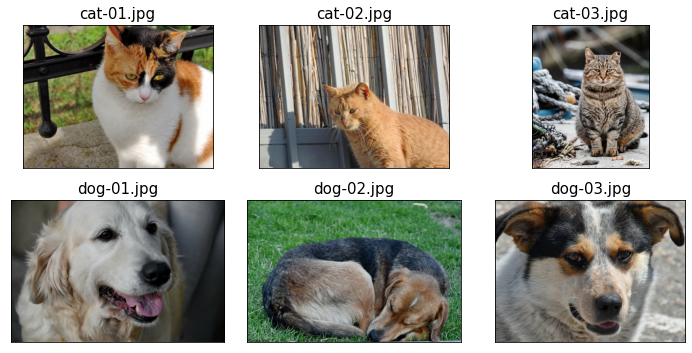

In [36]:
import matplotlib.pyplot as plt
import os

fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img_raw = tf.io.read_file(file)
    img = tf.image.decode_image(img_raw)
    print(f'Image shape: {img.shape}')
    ax = fig.add_subplot(2, 3, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
    
plt.tight_layout()
plt.show()

In [37]:
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
labels

[0, 0, 0, 1, 1, 1]

In [38]:
ds_files_labels = tf.data.Dataset.from_tensor_slices((file_list, labels))
for item in ds_files_labels:
    print(item[0].numpy(), item[1].numpy())

b'cat_dog_images\\cat-01.jpg' 0
b'cat_dog_images\\cat-02.jpg' 0
b'cat_dog_images\\cat-03.jpg' 0
b'cat_dog_images\\dog-01.jpg' 1
b'cat_dog_images\\dog-02.jpg' 1
b'cat_dog_images\\dog-03.jpg' 1


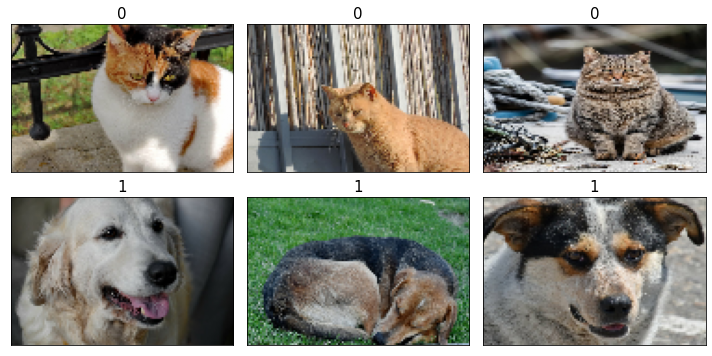

In [39]:
def load_and_preprocess(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image /= 255.0

    return image, label

img_width, img_height = 120, 80
ds_images_labels = ds_files_labels.map(load_and_preprocess)

fig = plt.figure(figsize=(10, 5))
for i, example in enumerate(ds_images_labels):
    ax = fig.add_subplot(2, 3, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(example[0])
    ax.set_title(f'{example[1].numpy()}', size=15)

plt.tight_layout()
plt.show()

## TensorFlow Keras API

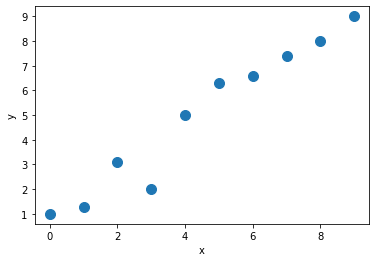

In [40]:
X_train = np.arange(10).reshape((10, -1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])

plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [41]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
ds_train_orig = tf.data.Dataset.from_tensor_slices((tf.cast(X_train_norm, tf.float32), tf.cast(y_train, tf.float32)))

In [42]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.w = tf.Variable(0.0, name='weight')
        self.b = tf.Variable(0.0, name='bias')

    def call(self, x):
        return self.w * x + self.b

In [43]:
model = MyModel()
model.build(input_shape=(None, 1))
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [44]:
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss_fn(model(inputs), outputs)
    dW, db = tape.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

In [45]:
tf.random.set_seed(1)
num_epochs = 200
log_steps = 100
learning_rate = 0.001
batch_size = 1
steps_per_epoch = int(np.ceil(len(y_train) / batch_size))

ds_train = ds_train_orig.shuffle(buffer_size=len(y_train))
ds_train = ds_train.repeat(count=None)
ds_train = ds_train.batch(1)
Ws, bs = [], []

for i, batch in enumerate(ds_train):
    if i >= steps_per_epoch * num_epochs:
        break
    
    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    
    bx, by = batch
    loss_val = loss_fn(model(bx), by)
    
    train(model, bx, by, learning_rate=learning_rate)
    if i % log_steps == 0:
        print(f'Epochs {int(i / steps_per_epoch): 4d} Step {i} Loss {loss_val: 6.4f}')

Epochs    0 Step 0 Loss  43.5600
Epochs   10 Step 100 Loss  0.7530
Epochs   20 Step 200 Loss  20.1759
Epochs   30 Step 300 Loss  23.3976
Epochs   40 Step 400 Loss  6.3481
Epochs   50 Step 500 Loss  4.6356
Epochs   60 Step 600 Loss  0.2411
Epochs   70 Step 700 Loss  0.2036
Epochs   80 Step 800 Loss  3.8177
Epochs   90 Step 900 Loss  0.9416
Epochs  100 Step 1000 Loss  0.7035
Epochs  110 Step 1100 Loss  0.0348
Epochs  120 Step 1200 Loss  0.5404
Epochs  130 Step 1300 Loss  0.1170
Epochs  140 Step 1400 Loss  0.1195
Epochs  150 Step 1500 Loss  0.0944
Epochs  160 Step 1600 Loss  0.4670
Epochs  170 Step 1700 Loss  2.0695
Epochs  180 Step 1800 Loss  0.0020
Epochs  190 Step 1900 Loss  0.3612


In [46]:
print(f'Final Parameters: {model.w.numpy()} {model.b.numpy()}')

Final Parameters: 2.6576621532440186 4.879856586456299


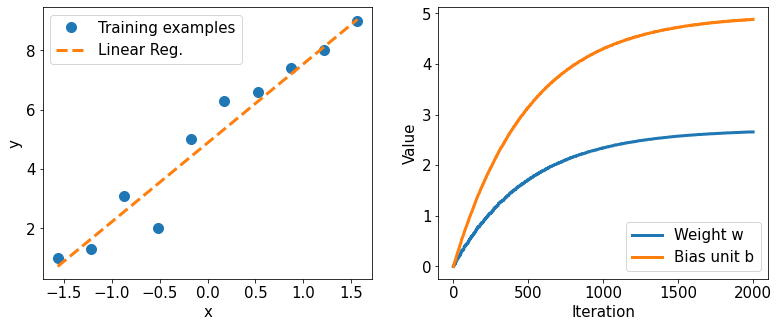

In [47]:
X_test = np.linspace(0, 9, num=100).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)

y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))

fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(Ws, lw=3)
plt.plot(bs, lw=3)
plt.legend(['Weight w', 'Bias unit b'], fontsize=15)
ax.set_xlabel('Iteration', size=15)
ax.set_ylabel('Value', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()

In [48]:
tf.random.set_seed(1)
model = MyModel()
model.compile(
    optimizer='sgd',
    loss=loss_fn,
    metrics=['mae', 'mse']
)

In [49]:
model.fit(X_train_norm, y_train, epochs=num_epochs, batch_size=batch_size, verbose=1)

Epoch 1/200
10/10 [==============================] - 0s 0s/step - loss: 27.8723 - mae: 4.5654 - mse: 27.8723
Epoch 2/200
10/10 [==============================] - 0s 2ms/step - loss: 18.6586 - mae: 3.7446 - mse: 18.6586
Epoch 3/200
10/10 [==============================] - 0s 0s/step - loss: 12.5239 - mae: 3.0454 - mse: 12.5239
Epoch 4/200
10/10 [==============================] - 0s 2ms/step - loss: 8.4670 - mae: 2.4907 - mse: 8.4670
Epoch 5/200
10/10 [==============================] - 0s 0s/step - loss: 5.7632 - mae: 2.0567 - mse: 5.7632
Epoch 6/200
10/10 [==============================] - 0s 651us/step - loss: 3.9697 - mae: 1.7232 - mse: 3.9697
Epoch 7/200
10/10 [==============================] - 0s 0s/step - loss: 2.7766 - mae: 1.4752 - mse: 2.7766
Epoch 8/200
10/10 [==============================] - 0s 2ms/step - loss: 1.9861 - mae: 1.2578 - mse: 1.9861
Epoch 9/200
10/10 [==============================] - 0s 0s/step - loss: 1.4572 - mae: 1.0978 - mse: 1.4572
Epoch 10/200
10/10 [=====

10/10 [==============================] - 0s 2ms/step - loss: 0.4136 - mae: 0.4939 - mse: 0.4136
Epoch 77/200
10/10 [==============================] - 0s 0s/step - loss: 0.4139 - mae: 0.4824 - mse: 0.4139
Epoch 78/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4136 - mae: 0.4811 - mse: 0.4136
Epoch 79/200
10/10 [==============================] - 0s 0s/step - loss: 0.4137 - mae: 0.4854 - mse: 0.4137
Epoch 80/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4136 - mae: 0.4842 - mse: 0.4136
Epoch 81/200
10/10 [==============================] - 0s 0s/step - loss: 0.4139 - mae: 0.4923 - mse: 0.4139
Epoch 82/200
10/10 [==============================] - 0s 0s/step - loss: 0.4137 - mae: 0.4861 - mse: 0.4137
Epoch 83/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4135 - mae: 0.4913 - mse: 0.4135
Epoch 84/200
10/10 [==============================] - 0s 651us/step - loss: 0.4139 - mae: 0.4861 - mse: 0.4139
Epoch 85/200
10/10 [==============

10/10 [==============================] - 0s 2ms/step - loss: 0.4140 - mae: 0.4936 - mse: 0.4140
Epoch 151/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4139 - mae: 0.4885 - mse: 0.4139
Epoch 152/200
10/10 [==============================] - 0s 651us/step - loss: 0.4139 - mae: 0.4876 - mse: 0.4139
Epoch 153/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4133 - mae: 0.4937 - mse: 0.4133
Epoch 154/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4140 - mae: 0.4925 - mse: 0.4140
Epoch 155/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4135 - mae: 0.4933 - mse: 0.4135
Epoch 156/200
10/10 [==============================] - 0s 0s/step - loss: 0.4139 - mae: 0.4902 - mse: 0.4139
Epoch 157/200
10/10 [==============================] - 0s 0s/step - loss: 0.4136 - mae: 0.4907 - mse: 0.4136
Epoch 158/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4130 - mae: 0.4830 - mse: 0.4130
Epoch 159/200
10/10 [===

In [50]:
print(f'Final Parameters: {model.w.numpy()} {model.b.numpy()}')

Final Parameters: 2.7067394256591797 4.965721607208252


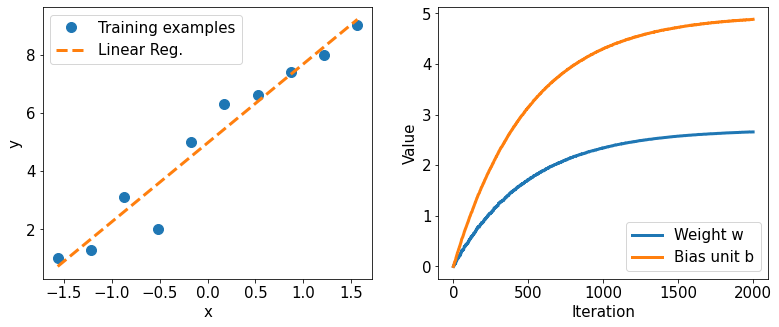

In [51]:
X_test = np.linspace(0, 9, num=100).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)

y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))

fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(Ws, lw=3)
plt.plot(bs, lw=3)
plt.legend(['Weight w', 'Bias unit b'], fontsize=15)
ax.set_xlabel('Iteration', size=15)
ax.set_ylabel('Value', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()

In [52]:
import tensorflow_datasets as tfds

iris, iris_info = tfds.load('iris', with_info=True, shuffle_files=False)

In [53]:
iris_info

tfds.core.DatasetInfo(
    name='iris',
    version=1.0.0,
    description='This is perhaps the best known database to be found in the pattern recognition
literature. Fisher's paper is a classic in the field and is referenced
frequently to this day. (See Duda & Hart, for example.) The data set contains
3 classes of 50 instances each, where each class refers to a type of iris
plant. One class is linearly separable from the other 2; the latter are NOT
linearly separable from each other.
',
    urls=['https://archive.ics.uci.edu/ml/datasets/iris'],
    features=FeaturesDict({
        'features': Tensor(shape=(4,), dtype=tf.float32),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=150,
    splits={
        'train': 150,
    },
    supervised_keys=('features', 'label'),
    citation="""@misc{Dua:2019 ,
    author = "Dua, Dheeru and Graff, Casey",
    year = "2017",
    title = "{UCI} Machine Learning Repository",
    url = "http://archive

In [54]:
tf.random.set_seed(1)

ds_orig = iris['train']
ds_orig = ds_orig.shuffle(150, reshuffle_each_iteration=False)
ds_train_orig = ds_orig.take(100)
ds_test = ds_orig.skip(100)

In [55]:
ds_train_orig = ds_train_orig.map(lambda x: (x['features'], x['label']))
ds_test = ds_test.map(lambda x: (x['features'], x['label']))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [56]:
iris_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='sigmoid', name='fc1', input_shape=(4, )),
    tf.keras.layers.Dense(3, activation='softmax', name='fc2'),
])
iris_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 16)                80        
_________________________________________________________________
fc2 (Dense)                  (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [57]:
iris_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [58]:
num_epochs = 100
training_size = 100
batch_size = 2
steps_per_epoch = np.ceil(training_size / batch_size)

ds_train = ds_train_orig.shuffle(buffer_size=training_size).repeat().batch(batch_size=batch_size).prefetch(buffer_size=1000)
history = iris_model.fit(ds_train, epochs=num_epochs, steps_per_epoch=steps_per_epoch, verbose=0)

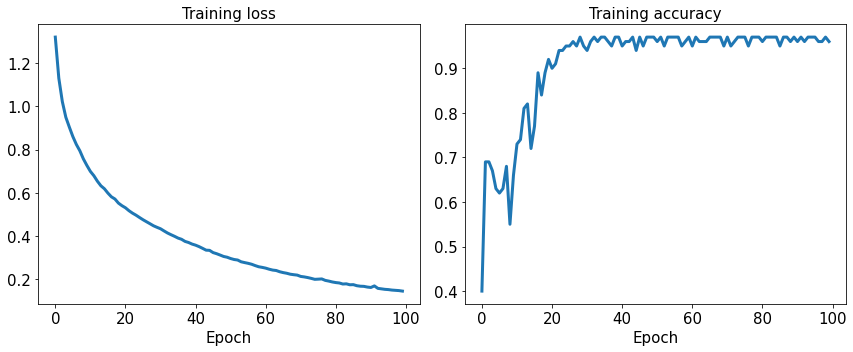

In [59]:
hist = history.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

plt.show()

In [60]:
results = iris_model.evaluate(ds_test.batch(50), verbose=0)

In [62]:
print(f'Test loss: {results[0]: .4f} Test Acc.: {results[1]: .4f}')

Test loss:  0.1491 Test Acc.:  1.0000


In [63]:
iris_model.save(
    'iris-classifier.h5',
    overwrite=True,
    include_optimizer=True,
    save_format='h5'
)